# Basic

In [42]:
# 텐서플로우의 기본적인 구성을 익힙니다.
import tensorflow as tf

# tf.constant: 말 그대로 상수입니다.
hello = tf.constant('Hello, TensorFlow!')  #tensorflow에서 tensor는 빈 그릇이라고 생각하긔 #마지막에 한꺼번에 값 넣어줌 
print(hello)

a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a, b)  # a + b 로도 쓸 수 있음
print(c)

# 위에서 변수와 수식들을 정의했지만, 실행이 정의한 시점에서 실행되는 것은 아닙니다.
# 다음처럼 Session 객제와 run 메소드를 사용할 때 계산이 됩니다.
# 따라서 모델을 구성하는 것과, 실행하는 것을 분리하여 프로그램을 깔끔하게 작성할 수 있습니다.
# 그래프를 실행할 세션을 구성합니다.
sess = tf.Session()  #빈 도화지라고 생각하긔 
# sess.run: 설정한 텐서 그래프(변수나 수식 등등)를 실행합니다.
print(sess.run(hello))
print(sess.run([a, b, c]))

# 세션을 닫습니다.
sess.close() #다른 도화지를 위해 close!

Tensor("Const_8:0", shape=(), dtype=string)
Tensor("Add_2:0", shape=(), dtype=int32)
b'Hello, TensorFlow!'
[10, 32, 42]


In [43]:
print(a)

Tensor("Const_9:0", shape=(), dtype=int32)


In [44]:
# tf.placeholder: 계산을 실행할 때 입력값을 받는 변수로 사용합니다.
# None 은 크기가 정해지지 않았음을 의미합니다.
X = tf.placeholder(tf.float32, [None, 3]) #고정된 값만 넣을 수 있음 상수값 #input과 output만 placeholder 나머지는 variable!
print(X)

# X 플레이스홀더에 넣을 값 입니다.
# 플레이스홀더에서 설정한 것 처럼, 두번째 차원의 요소의 갯수는 3개 입니다.
x_data = [[1, 2, 3], [4, 5, 6]]

# tf.Variable: 그래프를 계산하면서 최적화 할 변수들입니다. 이 값이 바로 신경망을 좌우하는 값들입니다.
# tf.random_normal: 각 변수들의 초기값을 정규분포 랜덤 값으로 초기화합니다.
W = tf.Variable(tf.random_normal([3, 2]))  #나머지!
b = tf.Variable(tf.random_normal([2, 1]))

# 입력값과 변수들을 계산할 수식을 작성합니다.
# tf.matmul 처럼 mat* 로 되어 있는 함수로 행렬 계산을 수행합니다.
expr = tf.matmul(X, W) + b #torch에서의 mm

sess = tf.Session()
# 위에서 설정한 Variable 들의 값들을 초기화 하기 위해
# 처음에 tf.global_variables_initializer 를 한 번 실행해야 합니다.
sess.run(tf.global_variables_initializer())

print("=== x_data ===")
print(x_data)
print("=== W ===")
print(sess.run(W))
print("=== b ===")
print(sess.run(b))
print("=== expr ===")
# expr 수식에는 X 라는 입력값이 필요합니다.
# 따라서 expr 실행시에는 이 변수에 대한 실제 입력값을 다음처럼 넣어줘야합니다.
print(sess.run(expr, feed_dict={X: x_data})) #feed_dict? #X는 placeholder로 고정된 상수값을 받을 그릇이었음 #x_data를 넣어줌! #expr연산을 하겠다

sess.close()

Tensor("Placeholder:0", shape=(?, 3), dtype=float32)
=== x_data ===
[[1, 2, 3], [4, 5, 6]]
=== W ===
[[-0.11426933  0.8304917 ]
 [ 1.5671462  -1.7116182 ]
 [-1.2127382   2.083053  ]]
=== b ===
[[ 0.3284303]
 [-1.8591098]]
=== expr ===
[[-0.2897612  3.9848452]
 [-1.7568854  5.4030848]]


In [27]:
#선형회귀를 할 것이야 
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

# name: 나중에 텐서보드등으로 값의 변화를 추적하거나 살펴보기 쉽게 하기 위해 이름을 붙여줍니다.
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")
print(X)
print(Y)

# X 와 Y 의 상관 관계를 분석하기 위한 가설 수식을 작성합니다.
# y = W * x + b
# W 와 X 가 행렬이 아니므로 tf.matmul 이 아니라 기본 곱셈 기호를 사용했습니다.
hypothesis = W * X + b  #선형회귀식이다 

# 손실 함수를 작성합니다.
# mean(h - Y)^2 : 예측값과 실제값의 거리를 비용(손실) 함수로 정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 경사 하강법 최적화를 수행합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# 비용을 최소화 하는 것이 최종 목표
train_op = optimizer.minimize(cost)

# 세션을 생성하고 초기화합니다.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # 최적화를 100번 수행합니다.
    for step in range(100):
        # sess.run 을 통해 train_op 와 cost 그래프를 계산합니다.
        # 이 때, 가설 수식에 넣어야 할 실제값을 feed_dict 을 통해 전달합니다.
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})

        print(step, cost_val, sess.run(W), sess.run(b)) #끝에 두개 기울기, 절편값!

    # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인해봅니다.
    print("\n=== Test ===")
    print("X: 5, Y:", sess.run(hypothesis, feed_dict={X: 5}))
    print("X: 2.5, Y:", sess.run(hypothesis, feed_dict={X: 2.5}))

Tensor("X:0", dtype=float32)
Tensor("Y:0", dtype=float32)
0 1.0092863 [0.8510262] [0.45279676]
1 0.03877372 [0.8089497] [0.42182693]
2 0.025911668 [0.8185326] [0.41388166]
3 0.02454917 [0.8223495] [0.40369228]
4 0.023381531 [0.8266797] [0.39401403]
5 0.02227085 [0.8308397] [0.38453934]
6 0.021212963 [0.83490694] [0.37529558]
7 0.020205341 [0.8388756] [0.3662737]
8 0.019245574 [0.8427489] [0.35746872]
9 0.018331382 [0.84652907] [0.34887543]
10 0.017460635 [0.8502184] [0.3404887]
11 0.016631236 [0.8538191] [0.33230358]
12 0.01584126 [0.8573332] [0.32431525]
13 0.0150887845 [0.8607628] [0.3165189]
14 0.014372055 [0.86411] [0.30891]
15 0.013689372 [0.8673767] [0.30148402]
16 0.013039112 [0.8705648] [0.29423654]
17 0.012419742 [0.87367636] [0.28716332]
18 0.0118298 [0.8767131] [0.28026012]
19 0.011267878 [0.8796768] [0.27352285]
20 0.010732642 [0.8825693] [0.26694757]
21 0.010222831 [0.8853923] [0.26053035]
22 0.009737226 [0.8881473] [0.25426736]
23 0.009274718 [0.8908362] [0.24815497]
24 0

# Tensorflow - CIFAR10

### Preprocessing

In [45]:
import tensorflow as tf
import pickle
import numpy as np
import matplotlib.pyplot as plt

cifar10_dataset_folder_path = './data/cifar-10-batches-py'

def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [46]:
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

features, labels = load_cfar10_batch(cifar10_dataset_folder_path, 1)

In [47]:
print(features.shape)
print(len(labels))

(10000, 32, 32, 3)
10000


In [48]:
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x 
    """
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

In [49]:
def one_hot_encode(x):
    """
        argument
            - x: a list of labels
        return
            - one hot encoding matrix (number of labels, number of class)
    """
    encoded = np.zeros((len(x), 10))
    
    for idx, val in enumerate(x):
        encoded[idx][val] = 1
    
    return encoded

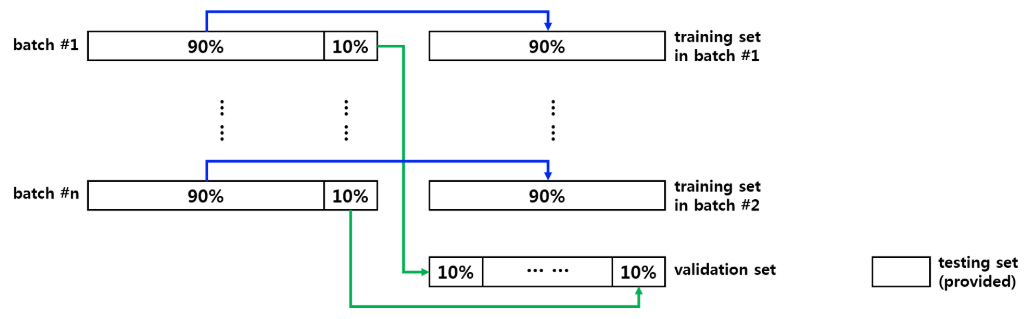

In [50]:
def _preprocess_and_save(normalize, one_hot_encode, features, labels, filename):
    features = normalize(features)
    labels = one_hot_encode(labels)

    pickle.dump((features, labels), open(filename, 'wb'))


def preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode):
    n_batches = 5
    valid_features = []
    valid_labels = []

    for batch_i in range(1, n_batches + 1):
        features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_i)
        
        # find index to be the point as validation data in the whole dataset of the batch (10%)
        index_of_validation = int(len(features) * 0.1)

        # preprocess the 90% of the whole dataset of the batch
        # - normalize the features
        # - one_hot_encode the lables
        # - save in a new file named, "preprocess_batch_" + batch_number
        # - each file for each batch
        _preprocess_and_save(normalize, one_hot_encode,
                             features[:-index_of_validation], labels[:-index_of_validation], 
                             'preprocess_batch_' + str(batch_i) + '.p')

        # unlike the training dataset, validation dataset will be added through all batch dataset
        # - take 10% of the whold dataset of the batch
        # - add them into a list of
        #   - valid_features
        #   - valid_labels
        valid_features.extend(features[-index_of_validation:])
        valid_labels.extend(labels[-index_of_validation:])

    # preprocess the all stacked validation dataset
    _preprocess_and_save(normalize, one_hot_encode,
                         np.array(valid_features), np.array(valid_labels),
                         'preprocess_validation.p')

    # load the test dataset
    with open(cifar10_dataset_folder_path + '/test_batch', mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    # preprocess the testing data
    test_features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    test_labels = batch['labels']

    # Preprocess and Save all testing data
    _preprocess_and_save(normalize, one_hot_encode,
                         np.array(test_features), np.array(test_labels),
                         'preprocess_training.p')

In [51]:
preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

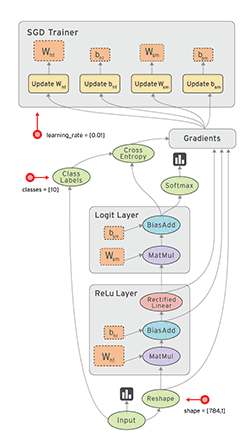

### Prepare Input

In [52]:
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = tf.placeholder(tf.float32, shape=(None, 32, 32, 3), name='input_x') #input #차원 확정되어있음 #batch는 모른다 
y =  tf.placeholder(tf.float32, shape=(None, 10), name='output_y')  #output 
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

In [53]:
def conv_net(x, keep_prob):
    conv1_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 3, 64], mean=0, stddev=0.08))
    conv2_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 64, 128], mean=0, stddev=0.08))
    conv3_filter = tf.Variable(tf.truncated_normal(shape=[5, 5, 128, 256], mean=0, stddev=0.08))
    conv4_filter = tf.Variable(tf.truncated_normal(shape=[5, 5, 256, 512], mean=0, stddev=0.08))

    # 1, 2
    conv1 = tf.nn.conv2d(x, conv1_filter, strides=[1,1,1,1], padding='SAME')
    conv1 = tf.nn.relu(conv1)
    conv1_pool = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv1_bn = tf.layers.batch_normalization(conv1_pool)

    # 3, 4
    conv2 = tf.nn.conv2d(conv1_bn, conv2_filter, strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(conv2)
    conv2_pool = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')    
    conv2_bn = tf.layers.batch_normalization(conv2_pool)
  
    # 5, 6
    conv3 = tf.nn.conv2d(conv2_bn, conv3_filter, strides=[1,1,1,1], padding='SAME')
    conv3 = tf.nn.relu(conv3)
    conv3_pool = tf.nn.max_pool(conv3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')  
    conv3_bn = tf.layers.batch_normalization(conv3_pool)
    
    # 7, 8
    conv4 = tf.nn.conv2d(conv3_bn, conv4_filter, strides=[1,1,1,1], padding='SAME')
    conv4 = tf.nn.relu(conv4)
    conv4_pool = tf.nn.max_pool(conv4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv4_bn = tf.layers.batch_normalization(conv4_pool)
    
    # 9
    flat = tf.contrib.layers.flatten(conv4_bn)  

    # 10
    full1 = tf.contrib.layers.fully_connected(inputs=flat, num_outputs=128, activation_fn=tf.nn.relu)
    full1 = tf.nn.dropout(full1, keep_prob)
    full1 = tf.layers.batch_normalization(full1)
    
    # 11
    full2 = tf.contrib.layers.fully_connected(inputs=full1, num_outputs=256, activation_fn=tf.nn.relu)
    full2 = tf.nn.dropout(full2, keep_prob)
    full2 = tf.layers.batch_normalization(full2)
    
    # 12
    full3 = tf.contrib.layers.fully_connected(inputs=full2, num_outputs=512, activation_fn=tf.nn.relu)
    full3 = tf.nn.dropout(full3, keep_prob)
    full3 = tf.layers.batch_normalization(full3)    
    
    # 13
    full4 = tf.contrib.layers.fully_connected(inputs=full3, num_outputs=1024, activation_fn=tf.nn.relu)
    full4 = tf.nn.dropout(full4, keep_prob)
    full4 = tf.layers.batch_normalization(full4)        
    
    # 14
    out = tf.contrib.layers.fully_connected(inputs=full3, num_outputs=10, activation_fn=None)
    return out

### Hyperparameters

In [54]:
epochs = 5
batch_size = 128
keep_probability = 0.7
learning_rate = 0.001

### Cost Function & Optimizer

In [55]:
logits = conv_net(x, keep_prob)
model = tf.identity(logits, name='logits') # Name logits Tensor, so that can be loaded from disk after training

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

### Train

In [56]:
## Single Optimization
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    session.run(optimizer, 
                feed_dict={  #feed_dict 하게 됨!
                    x: feature_batch,
                    y: label_batch,
                    keep_prob: keep_probability
                })

In [57]:
## Show Stats
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    loss = sess.run(cost, 
                    feed_dict={
                        x: feature_batch,
                        y: label_batch,
                        keep_prob: 1.
                    })
    valid_acc = sess.run(accuracy, 
                         feed_dict={
                             x: valid_features,
                             y: valid_labels,
                             keep_prob: 1.
                         })
    
    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(loss, valid_acc))

In [58]:
## Fully Train the Model
def batch_features_labels(features, labels, batch_size):
    """
    Split features and labels into batches
    """
    for start in range(0, len(features), batch_size):
        end = min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]

def load_preprocess_training_batch(batch_id, batch_size):
    """
    Load the Preprocessed Training data and return them in batches of <batch_size> or less
    """
    filename = 'preprocess_batch_' + str(batch_id) + '.p'
    features, labels = pickle.load(open(filename, mode='rb'))

    # Return the training data in batches of size <batch_size> or less
    return batch_features_labels(features, labels, batch_size)

In [59]:
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
                
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  

NameError: name 'valid_features' is not defined

### Test

In [ ]:
def test_model():
    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('input_x:0')
        loaded_y = loaded_graph.get_tensor_by_name('output_y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

test_model()